In [1]:
using SLMTools, Images, FreeTypeAbstraction, FileIO, Plots
using SLMTools: wrap

In [2]:
include("../src/SubImages.jl")

handAnnotate (generic function with 4 methods)

In [3]:
N = 128
L0 = natlat((N,N))

(-5.65685424949238:0.08838834764831843:5.568465901844061, -5.65685424949238:0.08838834764831843:5.568465901844061)

Intensity, modulus, phase:


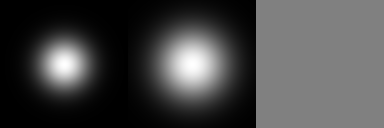

In [4]:
# Generate input beam
I = LF{ComplexAmp}( exp.(-r2(L0) ./ (3 + 0im)^2) , L0 )
println("Intensity, modulus, phase:")
look(square(I),I)

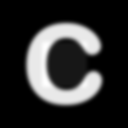

In [5]:
# Generate target intensity
C = lfRect(I|>square,(4,4))*0.1 + lfText(Intensity,L0,"c"; pixelsize=150)    # Letter c on low background
C = LF{Intensity}(imfilter(C.data, Kernel.gaussian(2)),C.L)                             # Blur the edges slightly
look(C)

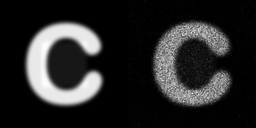

In [6]:
Φgs = gs(abs(I),sqrt(C),10000,wrap(LF{RealPhase}(rand(size(C)...),C.L)))    # Generate phase w/ GS + random initialization
look(C,square(sft(I * Φgs)))

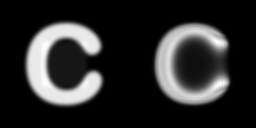

In [7]:
Φot = otPhase(square(I),C,0.001)     # Generate phase w/ OT
look(C,square(sft(I * Φot)))

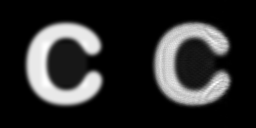

In [8]:
Φotgs = gs(abs(I),sqrt(C),10000,wrap(Φot))    # Generate phase w/ GS + OT initialization
look(C,square(sft(I * Φotgs)))

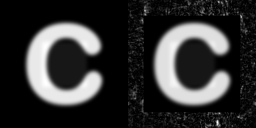

In [9]:
Φotmraf = mraf(abs(I),sqrt(C),10000,wrap(Φot),CartesianIndices((17:112,17:112)),0.48)
look(C,square(sft(I * Φotmraf)))

In [10]:
# Evaluate RMS error for each phase
for Φ in [Φgs,Φot,Φotgs,Φotmraf]
    println(SchroffError(C,square(sft(abs(I) * Φ))))
end

0.1797218967301413
0.14088676162776145
0.04482194006716487
4.211029903482144e-16


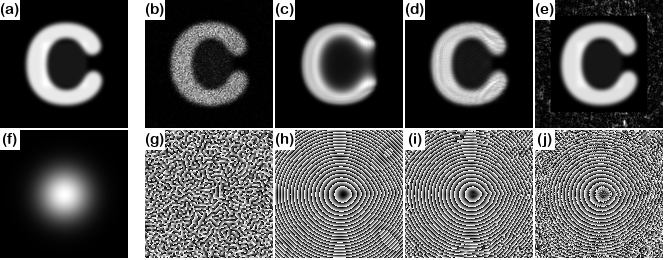

In [11]:
# Merge images
phases = [Φgs,Φot,Φotgs,Φotmraf]
outbeams = [square(sft(abs(I) * Φ)) for Φ in phases];
anns = handAnnotate(look.([C outbeams... ; square(I) phases...]), 
    ("(a)","(f)","(b)","(g)","(c)","(h)","(d)","(i)","(e)","(j)"),15,(20,20))
anns[:,1] = padadd.(anns[:,1],15,:r,1)
fig = mergeStrict(anns; padright = 2, padbottom=2, fillval=1)

In [12]:
# Get efficiencies
function boxEfficiency(F::LF{Intensity},roi::CartesianIndices)
    sum(F[roi].data)/sum(F.data)
end
function boxEfficiency(F::LF{<:Amplitude},roi::CartesianIndices)
    boxEfficiency(square(F),roi)
end
for Φ in [Φgs,Φot,Φotgs,Φotmraf]
    println(boxEfficiency(square(sft(abs(I) * Φ)),CartesianIndices((17:112,17:112))))
end

0.9825626601441777
0.999962578630945
0.9996089727155408
0.8520710059171597


<h3>Pretty figures.</h3>

In [13]:
function colorize(img; rgb0 = RGB(0,0,0), rgb1 = RGB(1,0,0), N = 256, cmap=nothing)
    if isnothing(cmap)
        cmap = cgrad([rgb0, rgb1],N)
    end
    x = convert.(Float64,img)
    x .*= (N-1)/maximum(x)
    x = round.(Int,x) .+ 1
    return convert.(RGB{Float64},[cmap[j] for j in x])
end

colorize (generic function with 1 method)

Matrix{Matrix{RGB{Float64}}}


,,,
,,,

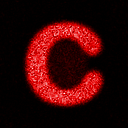
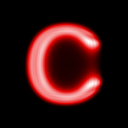
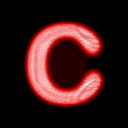
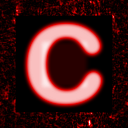
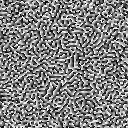
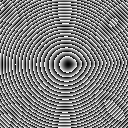
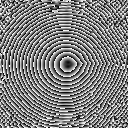
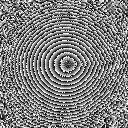

In [14]:
cl1 = x -> colorize(look(x);cmap = cgrad([RGB(0,0,0),RGB(0.9,0,0),RGB(1,1,1)],256))
cl2 = x -> colorize(look(x);cmap = cgrad([RGB(0,0,0),RGB(1,1,1)],256))
t = (x->reshape(x,(1,length(x))))
subimgs = vcat( cl1.(outbeams) |> t , cl2.(phases) |> t)
println(subimgs |> typeof)
subimgs

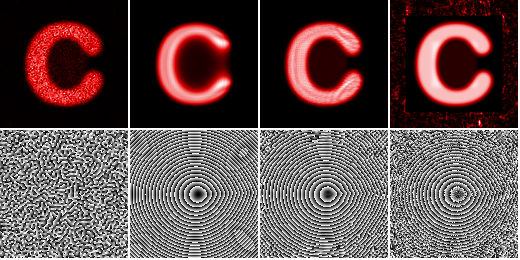

In [15]:

fig2 = mergeStrict(subimgs; padright = 2, padbottom=2, fillval=1)

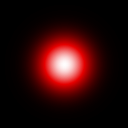

In [16]:
fig3 = cl1(I |> square)

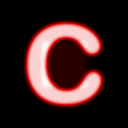

In [17]:
fig4 = cl1(C)

In [18]:
#=
save("phase-gen-output-comparison.png",fig2)
save("phase-gen-input-intensity.png",fig3)
save("phase-gen-target-intensity.png",fig4)
=#

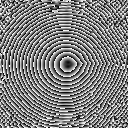

In [19]:
fig5 = cl1(outbeams[3])
fig6 = cl2(phases[3])

In [20]:
#=
save("phase-gen-gs-outbeam.png",fig5)
save("phase-gen-gs-phase.png",fig6)
=#

In [21]:
#= h5 outputs
using HDF5
h5write("phase-generation.h5", "mygroup2/input-intensity", square(I).data)
h5write("phase-generation.h5", "mygroup2/target-intensity", C.data)

h5write("phase-generation.h5", "mygroup2/gs-intensity", outbeams[1].data)
h5write("phase-generation.h5", "mygroup2/ot-intensity", outbeams[2].data)
h5write("phase-generation.h5", "mygroup2/otgs-intensity", outbeams[3].data)
h5write("phase-generation.h5", "mygroup2/otmraf-intensity", outbeams[4].data)

h5write("phase-generation.h5", "mygroup2/gs-phase", angle.(wrap(phases[1]).data))
h5write("phase-generation.h5", "mygroup2/ot-phase", angle.(wrap(phases[2]).data))
h5write("phase-generation.h5", "mygroup2/otgs-phase", angle.(wrap(phases[3]).data))
h5write("phase-generation.h5", "mygroup2/otmraf-phase", angle.(wrap(phases[4]).data))
=#